# MNIST

In [1]:
%pip install torch numpy matplotlib tqdm torchvision ipywidgets

Note: you may need to restart the kernel to use updated packages.


mps
60000
10000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000

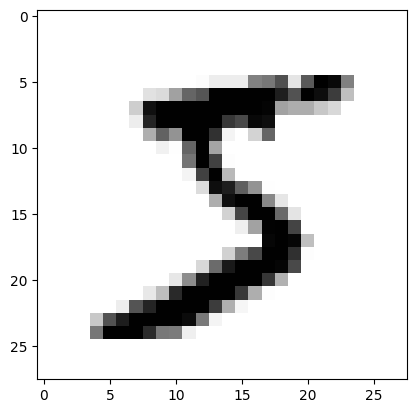

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"{device}")

train = datasets.MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test = datasets.MNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

print(len(train))
print(len(test))

print(train[0])
print(train[0][0].shape)

%matplotlib inline
plt.imshow(train[0][0][0].numpy(), cmap='gray_r')

# To minibatch

In [3]:
from torch.utils.data import DataLoader

batchsize = 32

train_loader = DataLoader(dataset=train, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batchsize, shuffle=False)

print(len(train_loader))
print(len(test_loader))

for (x, y) in train_loader:
    print(x.shape, y.shape)

1875
313
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
t

# MLP Design

In [8]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv1_activation = nn.ReLU()
        self.conv1_dropout = nn.Dropout(p=0.2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(2)
        self.conv2_activation = nn.ReLU()
        self.conv2_dropout = nn.Dropout(p=0.2)

        self.affine1 = nn.Linear(4704, 512)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)
        self.affine2 = nn.Linear(512, 128)
        self.activation2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)
        self.affine3 = nn.Linear(128, 10)

    def forward(self, x: torch.Tensor):
        # First convolutional block
        x1 = self.conv1(x)
        x1 = self.maxpool1(x1)
        x1 = self.conv1_activation(x1)
        x1 = self.conv1_dropout(x1)

        # Second convolutional block
        x2 = self.conv2(x1)
        x2 = self.maxpool2(x2)
        x2 = self.conv2_activation(x2)
        x2 = self.conv2_dropout(x2)

        # Adjust spatial dimensions for concatenation
        x1_resized = nn.functional.interpolate(x1, size=(7, 7)) 

        # Concatenate along the channel dimension
        x_concat = torch.cat((x2, x1_resized), dim=1)

        # Flatten for fully connected layers
        x_flat = x_concat.view(x_concat.size(0), -1)

        # Fully connected layers
        x = self.affine1(x_flat)
        x = self.activation1(x)
        x = self.dropout1(x)
        x = self.affine2(x)
        x = self.activation2(x)
        x = self.dropout2(x)
        x = self.affine3(x)
        return x


model = MLP()
model = model.to(device)

print(model)
print(sum(p.numel() for p in model.parameters()))

MLP(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1_activation): ReLU()
  (conv1_dropout): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_activation): ReLU()
  (conv2_dropout): Dropout(p=0.2, inplace=False)
  (affine1): Linear(in_features=4704, out_features=512, bias=True)
  (activation1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (affine2): Linear(in_features=512, out_features=128, bias=True)
  (activation2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (affine3): Linear(in_features=128, out_features=10, bias=True)
)
2494730


In [9]:
lr = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [10]:
from tqdm.notebook import tqdm

num_epochs = 10
iter = 0

for epoch in tqdm(range(num_epochs), desc="Epoch", position=1):
    for image, label in tqdm(train_loader, desc="Batch", position=0, leave=True):
        image, label = image.to(device), label.to(device)  # Send data to the target device

        optimizer.zero_grad()  # Clear previous gradients
        output = model(image)  # Forward pass
        loss = criterion(output, label)  # Calculate the loss
        
        loss.backward()  # Backward pass
        optimizer.step()  # Update model weights
        
        iter += 1  # Increment iteration count

print(f"Total iterations: {iter}")

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Batch:   0%|          | 0/1875 [00:00<?, ?it/s]

Total iterations: 18750


In [11]:
num_correct = 0

with torch.no_grad():
    for image, label in tqdm(test_loader, "Validation"):
        image, label = image.to(device), label.to(device)
        output = model(image)
        pred = output.argmax(dim=1)
        num_correct += (pred == label).sum()

print(f"Accuracy : { num_correct / len(test) * 100:.2f}%")

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Accuracy : 90.48%
